In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('car data.csv')

In [29]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [30]:
df.duplicated().sum()

2

In [31]:
df.drop_duplicates(inplace = True)

In [32]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [33]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [34]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


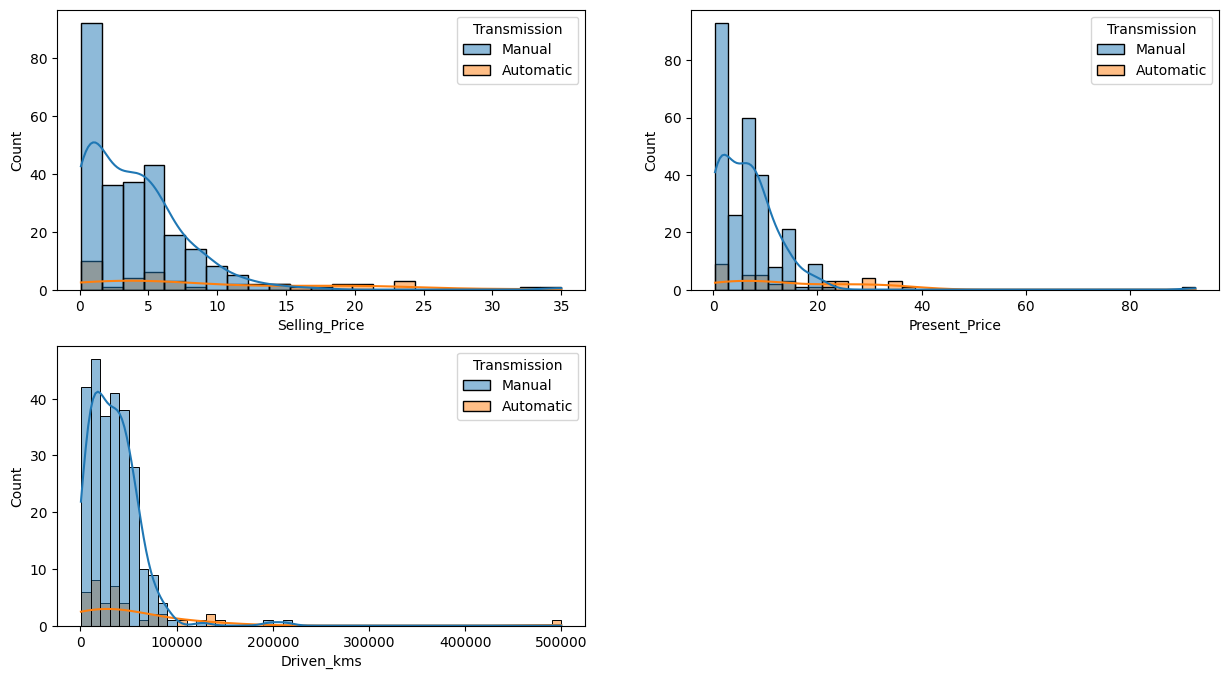

In [35]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Transmission')
plt.show()

In [36]:
Labelencode = LabelEncoder()

In [37]:
cat_vars = df.select_dtypes('O').columns
for i in cat_vars:

    df[i] = Labelencode.fit_transform(df[i])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


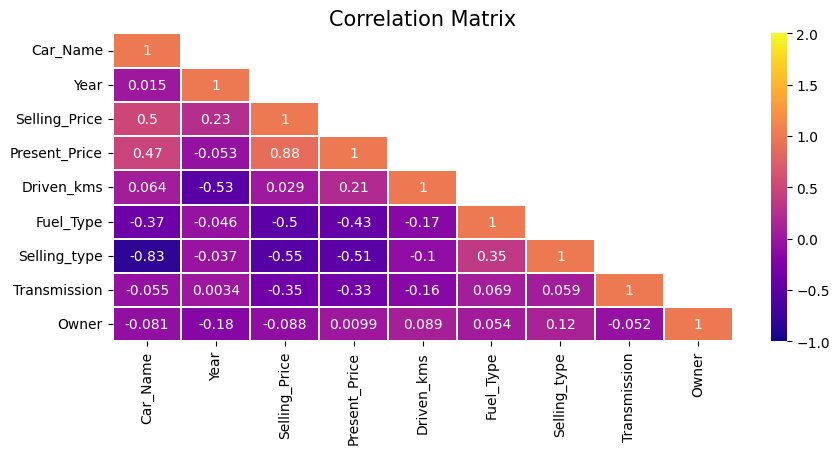

In [38]:
cor =df.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='plasma')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

In [39]:
df.drop(columns = 'Selling_type',axis = 1,inplace=True)

In [40]:
Y = df['Selling_Price']
X = df.drop(columns = 'Selling_Price')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2, random_state = 23)

In [43]:
scale = MinMaxScaler()
Xtrain = scale.fit_transform(Xtrain)

In [44]:
Xtest = scale.transform(Xtest)

In [45]:
model = LinearRegression()
model.fit(Xtrain, ytrain)


ypred = model.predict(Xtest)


mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

In [46]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2.05
R-squared (R2): 0.87


In [47]:
rf_model = RandomForestRegressor(random_state=17)


rf_model.fit(Xtrain, ytrain)


rf_Y_pred = rf_model.predict(Xtest)


rf_mse = mean_squared_error(ytest, rf_Y_pred)
rf_r2 = r2_score(ytest, rf_Y_pred)
print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 0.37
Random Forest R-squared (R2): 0.98
